# Week 10: Lecture 2
## Transposition
- The process of converting the orientation of a table is known as **transposition**

In [3]:
import pandas as pd

df = pd.DataFrame(
    {
        "student": ["A", "B", "C"],
        "iPDI": [75, 65, 82],
        "PDI1": [85, 62, 75],
        "PDI2": [78, 68, 62],
    }
)

In [4]:
df

,student,iPDI,PDI1,PDI2
0,A,75,85,78
1,B,65,62,68
2,C,82,75,62


- pandas provides the `.T` accessor or `transpose()` method to change the orientation of the data
- Doesn't change the structure or relationships in the data
- Rotates the data 90 degrees, columns become indices
- Useful for certain kinds of statistical analysis and visualisation

In [5]:
df.T

,0,1,2
student,A,B,C
iPDI,75,65,82
PDI1,85,62,75
PDI2,78,68,62


## Long vs Wide Data
- Wide and long data formats represent the same information in fundamentally different ways
  - **Wide format**: each row represents a single entity
  - **Long format**: stacks this data vertically using categorical columns
- Wide data formats are preferable for presentation and summary tables
- Long format data is typically considered *tidy* because it properly separates variables into columns
  - Preferable for statistical analysis and visualisation
- The [Tidy Data](https://onesearch.library.northeastern.edu/permalink/01NEU_INST/1jo8mhm/cdi_doaj_primary_oai_doaj_org_article_6ab280a7154547029e9a3ee9d8b6c767) structure proposed by Wickham defines a standard way of structuring a dataset

### Tidy Data

  1. Each variable forms a column
  2. Each observation forms a row
  3. Each distinct type of observational unit should have its own table

## Melting and Pivoting
### Melting and Pivoting
- We can use the `melt()` method to [transform "wide" data into "long" format](https://pandas.pydata.org/docs/user_guide/reshaping.html#melt-and-wide-to-long)
- Unlike transposition, melting changes the shape and structure of the data
- The `id_vars` attribute is used to specify the columns you want to keep
- The `var_name` attribute contains the name of the old column names as values

In [6]:
long = df.melt(id_vars="student", var_name="course", value_name="score")
long

,student,course,score
0,A,iPDI,75
1,B,iPDI,65
2,C,iPDI,82
3,A,PDI1,85
4,B,PDI1,62
5,C,PDI1,75
6,A,PDI2,78
7,B,PDI2,68
8,C,PDI2,62


- We can turn this back into a wide format using the [pivot method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
- Pivoting back is often necesary to produce visualisations where a wide format is preferred

In [7]:
long.pivot(index="student", columns="course", values="score")

course,PDI1,PDI2,iPDI
student,,,
A,85,78,75
B,62,68,65
C,75,62,82


## Melting Multiple Columns
- If there are multiple columns to melt, we can use `value_vars` and `id_vars` attributes
- Suppose we start with a table like this:

In [8]:
df = pd.DataFrame(
    {
        "student": ["A", "B", "C"],
        "iPDI": [75, 65, 82],
        "PDI1": [85, 62, 75],
        "PDI2": [78, 68, 62],
        "major": ["Humanities", "CS", "Physics"],
    }
)

df

,student,iPDI,PDI1,PDI2,major
0,A,75,85,78,Humanities
1,B,65,62,68,CS
2,C,82,75,62,Physics


In [9]:
df = df.melt(
    id_vars=["student", "major"],
    value_vars=["iPDI", "PDI1", "PDI2"],
    var_name="course",
    value_name="score",
)

df

,student,major,course,score
0,A,Humanities,iPDI,75
1,B,CS,iPDI,65
2,C,Physics,iPDI,82
3,A,Humanities,PDI1,85
4,B,CS,PDI1,62
5,C,Physics,PDI1,75
6,A,Humanities,PDI2,78
7,B,CS,PDI2,68
8,C,Physics,PDI2,62


- We can pivot this back to the original DataFrame as follows
- The [reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) removes the MultiIndex

In [10]:
df.pivot(index=["student", "major"], columns="course", values="score").reset_index()

course,student,major,PDI1,PDI2,iPDI
0,A,Humanities,85,78,75
1,B,CS,62,68,65
2,C,Physics,75,62,82


## Grouping
- Long data formats produced by melting are optimal for performing [grouping operations](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
- Grouping enables you to [slice datasets by values](https://pandas.pydata.org/docs/user_guide/groupby.html)
  - Calculate groupwise statistics and apply transformations to different subsets of data
- Group by consists of three operations: [split, apply, combine](https://www.jstatsoft.org/article/view/v040i01)
  - Data is *split* into groups based on keys
  - A function is *applied* to each group
  - The results of those functions are *combined* into a new result object

## GroupBy
- Grouped data creates a GroupBy object

In [11]:
long.groupby("course")

- We can get the [indicies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.indices.html#pandas.core.groupby.DataFrameGroupBy.indices) of the groups inside that object using the `indices` attribute
- This returns a dictionary with keys for each group and values containing their corresponding row index

In [12]:
df.groupby("course").indices

{'PDI1': array([3, 4, 5]), 'PDI2': array([6, 7, 8]), 'iPDI': array([0, 1, 2])}

- We can use the indices to `get` particular groups with an `iloc`

In [13]:
df.iloc[long.groupby("course").indices.get("PDI1")]

,student,major,course,score
3,A,Humanities,PDI1,85
4,B,CS,PDI1,62
5,C,Physics,PDI1,75


## Aggregating a GroupBy
- GroupBys are typically aggregated to create a computed dataframe for grouped data
- We can use a number of [built-in aggregation methods](https://pandas.pydata.org/docs/user_guide/groupby.html#built-in-aggregation-methods) which can be applied to all groups
- The size method is useful for getting the size of the groups

In [14]:
df.groupby("major")["score"].size()

major
CS            3
Humanities    3
Physics       3
Name: score, dtype: int64

- Numerical columns can be used to perform statistical calculations

In [15]:
df.groupby("course")["score"].max()

course
PDI1    85
PDI2    78
iPDI    82
Name: score, dtype: int64

- nlargest and nsmallest are useful for getting sets of smallest and largest values

In [16]:
df.groupby("course")["score"].nlargest(2)

course   
PDI1    3    85
        5    75
PDI2    6    78
        7    68
iPDI    2    82
        0    75
Name: score, dtype: int64

- We can group data using two keys to create a hierarchical index
- This allows us to group by multiple categories
- Returns a MultiIndex with grouping by multiple columns

In [17]:
df.groupby(["major", "course"])["score"].mean()

major       course
CS          PDI1      62.0
            PDI2      68.0
            iPDI      65.0
Humanities  PDI1      85.0
            PDI2      78.0
            iPDI      75.0
Physics     PDI1      75.0
            PDI2      62.0
            iPDI      82.0
Name: score, dtype: float64

## Class Exercises
Load `photos.csv` and answer the following question without using `value_counts`
- How many photos were taken in each location?
- What is the most photographed subject?

In [37]:
photos = pd.read_csv('photos.csv')

photos.groupby("Location").size()

Location
Berlin, Germany                   9
Cairo, Egypt                      5
Cape Town, South Africa           6
Grand Canyon, AZ                  8
London, UK                        7
Los Angeles, CA                   7
Machu Picchu, Peru               10
New York, NY                      7
Paris, France                     8
Rio de Janeiro, Brazil            2
Rome, Italy                      12
San Francisco, CA                 4
Sydney, Australia                 6
Tokyo, Japan                      7
Yellowstone National Park, WY     2
dtype: int64

In [19]:
photos.groupby("Subject").size()

Subject
Architecture       4
Beach              4
Birthday party     9
City skyline       6
Concert           11
Festival           7
Food               6
Forest             9
Mountain           7
Museum exhibit     5
Portrait           5
Street art         7
Sunset             7
Wedding            8
Wildlife           5
dtype: int64

- A quick way to create a year column in the `photos` dataset is by extracting the first four characters of the `Date` column
```python
photos["Date"].str[0:4]
```
  - Group by year and count how many photos were taken each year
  - Create a bar plot showing photos per year

In [44]:
photos["year"] = photos["Date"].str[0:4]

In [28]:
photos_per_year = photos.groupby("year").size()
print(photos_per_year)

year
2021    24
2022    26
2023    22
2024    22
2025     6
dtype: int64


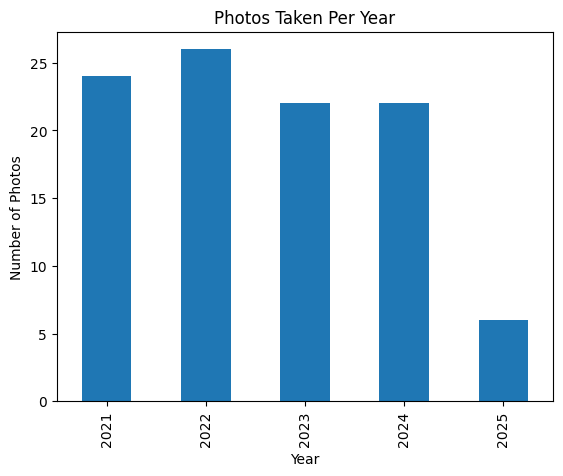

In [29]:
import matplotlib.pyplot as plt

photos_per_year.plot(kind="bar")

plt.xlabel("Year")
plt.ylabel("Number of Photos")
plt.title("Photos Taken Per Year")

plt.show()


- Create a visualization showing which locations were most photographed each year.
  - Hint: Group by both year and location

In [47]:
grouped = photos.groupby(["year", "Location"]).size()

In [55]:
pivot = grouped.unstack(fill_value=0)

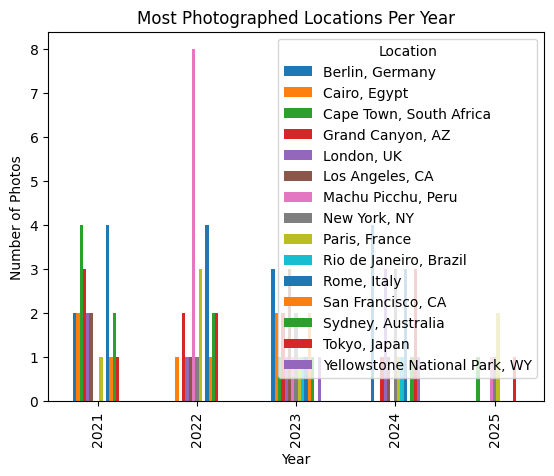

In [56]:
import matplotlib.pyplot as plt

pivot.plot(kind="bar")

plt.xlabel("Year")
plt.ylabel("Number of Photos")
plt.title("Most Photographed Locations Per Year")

plt.legend(title="Location")
plt.show()


Load `workouts.csv` and answer the following questions:
For each exercise type, calculate:
- Average duration
- Average calories burned
- Average heart rate

In [58]:
workouts = pd.read_csv('workouts.csv')

In [60]:

workouts.groupby("exercise_type").agg({
    "duration_minutes": "mean",
    "calories_burned": "mean",
    "heart_rate": "mean"
})



,duration_minutes,calories_burned,heart_rate
exercise_type,,,
boxing,56.480000,457.440000,143.360000
cardio,70.157895,457.210526,121.947368
hiit,67.750000,480.333333,137.166667
strength training,59.058824,522.588235,131.882353
yoga,58.066667,544.133333,134.400000


- Calculate the "calories per minute" for each workout, then:
  - Find which exercise type is most efficient on average
  - Create a box plot showing the distribution of efficiency by exercise type

In [69]:
workouts["calories_per_min"] = workouts["calories_burned"] / workouts["duration_minutes"]

In [73]:
workouts.groupby("exercise_type")["calories_per_min"].mean()

exercise_type
boxing               13.610994
cardio                8.653736
hiit                  9.235642
strength training    14.387138
yoga                 13.704191
Name: calories_per_min, dtype: float64

In [75]:
print(workouts.groupby("exercise_type")["calories_per_min"].mean().max())

14.387137631281819
